In [1]:
import control
from control import matlab
import numpy as np
import matplotlib.pyplot as plt

[-2.5+6.2249498j -2.5-6.2249498j]


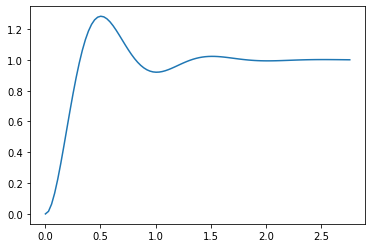

In [2]:
A = np.array([
    [-5, 1],
    [-45, 0],
])
B = np.array([
    [0],
    [45],
])
C = np.array([
    [1, 0]
])
D = 0
sys = control.ss(A, B, C, D)
print(sys.pole()) #não possui um polo na origen
t, y = control.step_response(sys)
plt.plot(t, y)

# Q1

Autovalores desejados = [(-6.000000000000001+8.000000000000002j), (-6.000000000000001-8.000000000000002j), -30]

A_hat =
 [[ -5   1   0]
 [-45   0   0]
 [ -1   0   0]]

B_hat =
 [[ 0]
 [45]
 [ 0]]

K = [[5.11111111 0.82222222]]
ki = [[66.66666667]]
Autovalores obtidos =, [ -6.+8.j  -6.-8.j -30.+0.j]


Text(0.5, 1.0, 'x2(t)')

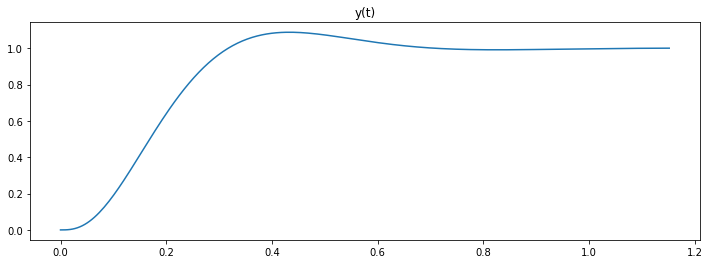

<Figure size 864x288 with 0 Axes>

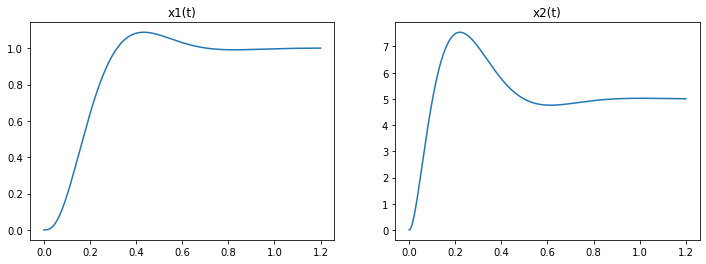

In [3]:
# Servosistema tipo 0
zeta = 0.6
ts5 = 0.5 #s
wn = 3/(zeta*ts5)
eigenvalues = list(np.roots([1, 2*zeta*wn, wn**2]))
eigenvalues.append(-30)
print('Autovalores desejados =', eigenvalues)

A_hat = np.block([
    [A, np.zeros_like(C.T)],
    [-C, 0],
])
print('\nA_hat =\n', A_hat)
B_hat = np.block([
    [B],
    [0]
])
print('\nB_hat =\n', B_hat)
K_hat = control.acker(A_hat, B_hat, eigenvalues)
K = K_hat[:, :-1]
ki = -K_hat[:, -1]
print('\nK =', K)
print('ki =', ki)


A_new = np.block([
    [A-B*K, B*ki],
    [-C, 0],
])
B_new = np.array([
    [0],
    [0],
    [1],
])
C_new = np.array([
    [1, 0 , 0]
])
sys_new = control.ss(A_new, B_new, C_new, D)
print('Autovalores obtidos =,', sys_new.pole())

# Simulação do sistema
t, y = control.step_response(sys_new)
plt.figure(figsize=(12,4))
plt.plot(t, y)
plt.title('y(t)')

plt.figure(figsize=(12,4))
tfinal = 1.2
t = np.linspace(0, tfinal, 3001)
r = np.ones(3001)
Y, t, X = matlab.lsim(sys_new, U=r, T=t)
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(t, X[:, 0])
plt.title('x1(t)')

plt.subplot(1, 2, 2)
plt.plot(t, X[:, 1])
plt.title('x2(t)')

Text(0.5, 1.0, 'x2(t)')

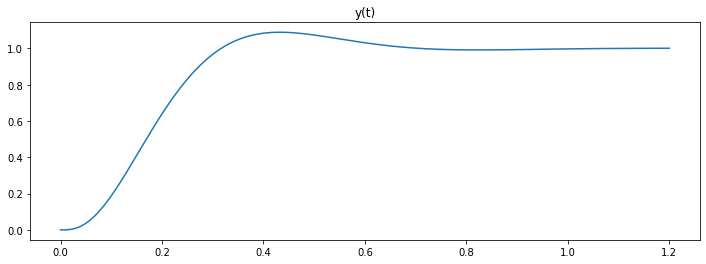

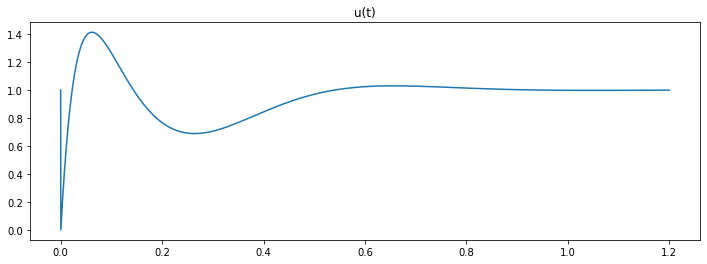

<Figure size 864x288 with 0 Axes>

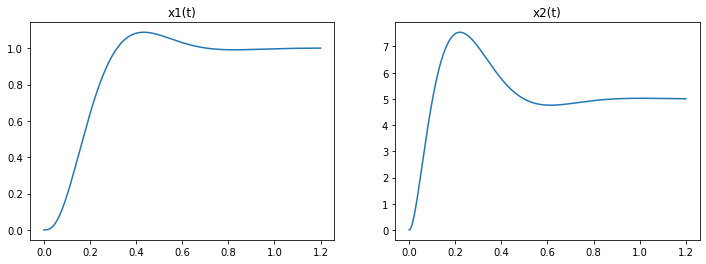

In [4]:
tfinal = 1.2
t = np.linspace(0, tfinal, 3001)
n_steps = len(t)
T = t[1]

r = np.ones(n_steps)
u = np.empty(n_steps)
y = np.empty(n_steps)
erro = np.empty(n_steps)
X = np.empty((n_steps, A.shape[0]))
X_dot = np.empty((n_steps, A.shape[0]))
ksi = np.empty(n_steps)
ksi_dot = np.empty(n_steps)

i=0
X[i, :] = np.array([0,0])
X_dot[i, :] = np.array([0,0])
ksi[i] = 0
ksi_dot[i] = 0
u[i] = (-K*np.matrix(X[i, :]).T)[0,0] + r[i]
y[i] = (np.matrix(X[i, :])*C.T)[0, 0]

for i in range(1, n_steps):
    
    ksi[i] = T*ksi_dot[i-1] + ksi[i-1]
    
    X[i, :] = T*X_dot[i-1, :] + X[i-1, :]
    u[i] = (-K*np.matrix(X[i, :]).T)[0,0] + ki*ksi[i]
    y[i] = (np.matrix(X[i, :])*C.T)[0, 0]
    
    X_dot[i, :] =  (A*np.matrix(X[i, :]).T).T + u[i]*B.T
    ksi_dot[i] = r[i] -  y[i]
    

#t, y = control.step_response(sys_new)
plt.figure(figsize=(12,4))
plt.plot(t, y)
plt.title('y(t)')

plt.figure(figsize=(12,4))
plt.plot(t, u)
plt.title('u(t)')

plt.figure(figsize=(12,4))
tfinal = 1.2
t = np.linspace(0, tfinal, 3001)
r = np.ones(3001)
Y, t, X = matlab.lsim(sys_new, U=r, T=t)
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(t, X[:, 0])
plt.title('x1(t)')

plt.subplot(1, 2, 2)
plt.plot(t, X[:, 1])
plt.title('x2(t)')

# Q1 alternativo

Autovalores desejados = [(-6.000000000000001+8.000000000000002j), (-6.000000000000001-8.000000000000002j), -30]
K = [[4.11111111 5.11111111]]
[  -6.02690908+0.j -228.97309092+0.j]


Text(0.5, 1.0, 'x2(t)')

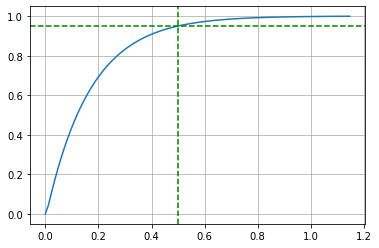

<Figure size 864x288 with 0 Axes>

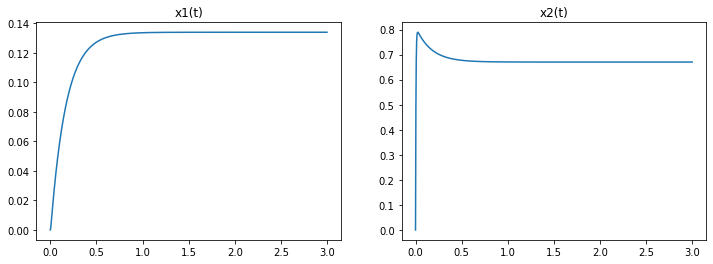

In [5]:
# Servosistema tipo 1
zeta = 0.6
ts5 = 0.5 #s
wn = 3/(zeta*ts5)
eigenvalues = list(np.roots([1, 2*zeta*wn, wn**2]))
eigenvalues.append(-30)
print('Autovalores desejados =', eigenvalues)


K = control.acker(A, B, eigenvalues)
print('K =', K)

A_new = A - B*K
B_new = B*K[0, 0]
C_new = C*1/0.13392028905137873 # ganho dc do sistema controlado sem ganho
sys_new = control.ss(A_new, B_new, C_new, D)
print(sys_new.pole())

# Simulação do sistema
t, y = control.step_response(sys_new)
plt.plot(t, y)
plt.grid()
plt.axhline(y=0.95, linestyle='--', color='green')
plt.axvline(x=0.5, linestyle='--', color='green')

plt.figure(figsize=(12,4))
tfinal = 3
t = np.linspace(0, tfinal, 3001)
r = np.ones(3001)
Y, t, X = matlab.lsim(sys_new, U=r, T=t)
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(t, X[:, 0])
plt.title('x1(t)')

plt.subplot(1, 2, 2)
plt.plot(t, X[:, 1])
plt.title('x2(t)')

Text(0.5, 1.0, 'Eq. Rec. x2(t)')

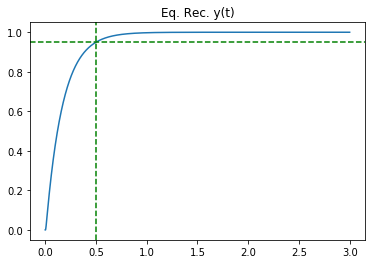

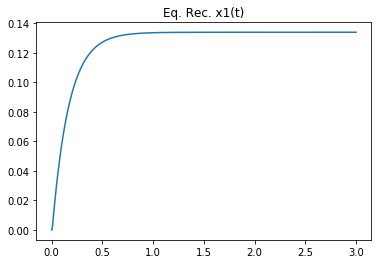

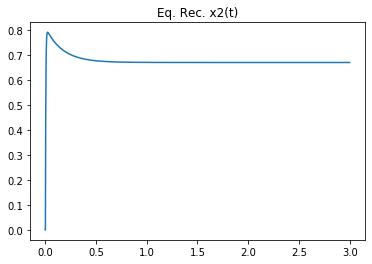

In [6]:
tfinal = 3
t = np.linspace(0, tfinal, 3001)
n_steps = len(t)
T = t[1]

r = np.ones(n_steps)
u = np.empty(n_steps)
y = np.empty(n_steps)
X = np.empty((n_steps, A.shape[0]))
X_dot = np.empty((n_steps, A.shape[0]))

i=0
X[i, :] = np.array([0,0])
X_dot[i, :] = np.array([0,0])
u[i] = (-K*np.matrix(X[i, :]).T)[0,0] + r[i]
y[i] = (np.matrix(X[i, :])*C.T)[0, 0]

for i in range(1, n_steps):
    X[i, :] = T*X_dot[i-1, :] + X[i-1, :]
    u[i] = (-K*np.matrix(X[i, :]).T)[0,0] + K[0, 0]*r[i]
    y[i] = (np.matrix(X[i, :])*C.T)[0, 0]*C_new[0, 0]
    X_dot[i, :] =  (A*np.matrix(X[i, :]).T).T + u[i]*B.T
    
plt.plot(t, y)
plt.title('Eq. Rec. y(t)')
plt.axhline(y=0.95, linestyle='--', color='green')
plt.axvline(x=0.5, linestyle='--', color='green')

plt.figure()
plt.plot(t, X[:, 0])
plt.title('Eq. Rec. x1(t)')

plt.figure()
plt.plot(t, X[:, 1])
plt.title('Eq. Rec. x2(t)')

# Q2

Autovalores desejados = [(-29.999999999999993+40.00000000000001j), (-29.999999999999993-40.00000000000001j)]
Ke = [[  55.]
 [2455.]]

A_obs:
 [[-5.000e+00  1.000e+00  0.000e+00  0.000e+00]
 [-4.500e+01  0.000e+00  0.000e+00  0.000e+00]
 [ 5.500e+01  0.000e+00 -6.000e+01  1.000e+00]
 [ 2.455e+03  0.000e+00 -2.500e+03  0.000e+00]]

B_obs:
 [[ 0]
 [45]
 [ 0]
 [45]]


Text(0.5, 1.0, 'x2_observado(t)')

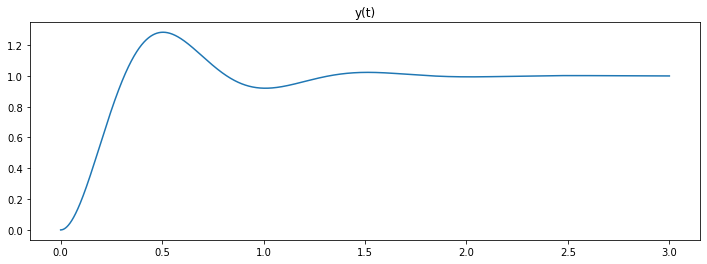

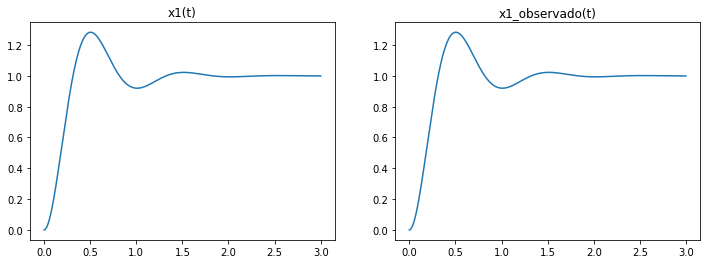

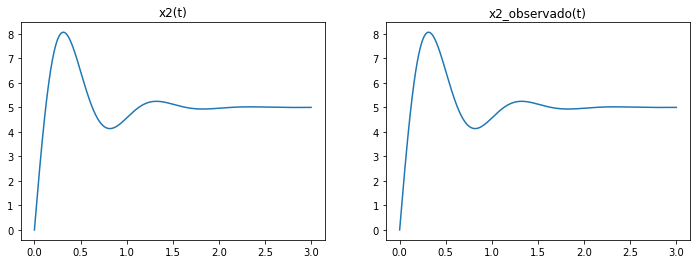

In [7]:
zeta = 0.6
ts5 = 0.5/5 #s
wn = 3/(zeta*ts5)
eigenvalues_obs = list(np.roots([1, 2*zeta*wn, wn**2]))
#eigenvalues.append(-30)
print('Autovalores desejados =', eigenvalues_obs)

K_obs = control.acker(A.T, C.T, eigenvalues_obs)
Ke = K_obs.T
print('Ke =', Ke)

A_obs = np.block([
    [A, np.zeros((2, 2))],
    [Ke*C, A-Ke*C],
])
print('\nA_obs:\n', A_obs)
B_obs = np.block([
    [B],
    [B],
])
print('\nB_obs:\n', B_obs)
C_obs = np.array([
    [1, 0, 0, 0]
])
sys_obs = control.ss(A_obs, B_obs, C_obs, D)

# Output
plt.figure(figsize=(12,4))
tfinal = 3
t = np.linspace(0, tfinal, 3001)
r = np.ones(3001)
Y, t, X = matlab.lsim(sys_obs, U=r, T=t)
plt.plot(t, Y)
plt.title('y(t)')

# Internal states
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(t, X[:, 0])
plt.title('x1(t)')

plt.subplot(1, 2, 2)
plt.plot(t, X[:, 2])
plt.title('x1_observado(t)')

plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(t, X[:, 1])
plt.title('x2(t)')

plt.subplot(1, 2, 2)
plt.plot(t, X[:, 3])
plt.title('x2_observado(t)')